In [27]:
import numpy as np
from task2module.task2module import *
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
plt.figure(figsize=(8, 6), dpi = 80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
%matplotlib inline

In [19]:
np.random.seed(42)

In [4]:
f1, segm1 = lambda x: np.power(x, 3), [0, 1]
f2, segm2 = lambda x: np.abs(x - 0.2), [0, 1]
f3, segm3 = lambda x: x * np.sin(1/x), [1e-2, 1]

Let's have a look at $f1$ function on the segment $segm1 = [0, 1]$.

Text(0, 0.5, 'y')

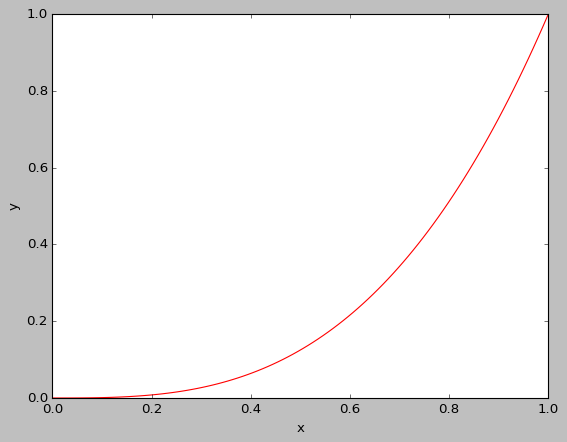

In [9]:
X = np.linspace(segm1[0], segm1[1], 100)
Y = f1(X)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(X, Y, "r")
plt.xlabel("x")
plt.ylabel("y")

In [6]:
exhaustive_search(f1), dichotomy_method(f1), goldenratio_method(f1)

((0, 0, 1000, 1001),
 (0.0009877929687499998, 9.638241220964113e-10, 10, 21),
 (0.00036656871792872, 4.9256800857735554e-11, 15, 18))

Text(0, 0.5, 'y')

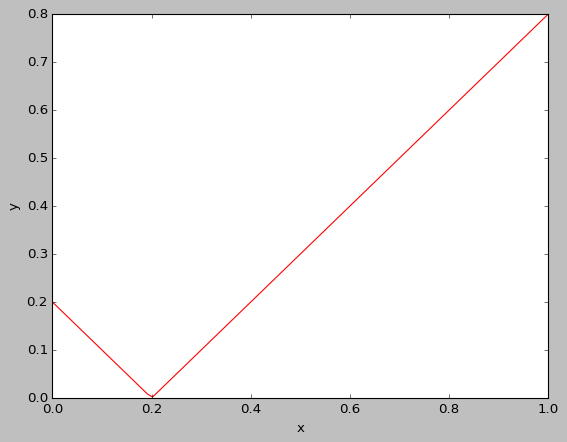

In [10]:
X = np.linspace(segm2[0], segm2[1], 100)
Y = f2(X)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(X, Y, "r")
plt.xlabel("x")
plt.ylabel("y")

In [11]:
exhaustive_search(f2), dichotomy_method(f2), goldenratio_method(f2)

((0.2, 0.0, 1000, 1001),
 (0.20000732421875, 7.324218749993339e-06, 10, 21),
 (0.20007331374358567, 7.331374358565679e-05, 15, 18))

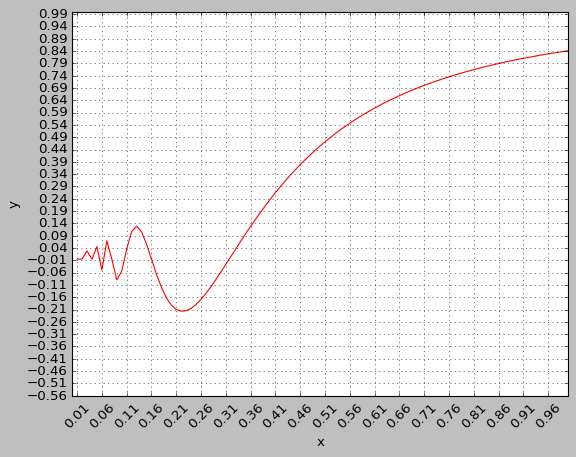

In [12]:
X = np.linspace(segm3[0], segm3[1], 100)
Y = f3(X)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(X, Y, "r")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(rotation = 45)
ax.set_xticks(np.arange(segm3[0], segm3[1], 0.05))
ax.set_yticks(np.arange(-0.56, 1, 0.05))
ax.grid(True)

In [13]:
exhaustive_search(f3, left = 1e-2), dichotomy_method(f3, left = 1e-2), goldenratio_method(f3, left = 1e-2)

((0.223, -0.21722461258083445, 990, 991),
 (0.22249755859374998, -0.21723351480649133, 10, 21),
 (0.22271959361960314, -0.2172323281775325, 15, 18))

In [5]:
g = lambda x, y: (x-0.42)**2 + (y-0.58)**2
exhaustive_search2d(g)

(0.42, 0.58, 0.0)

In [43]:
np.random.seed(43)

N = 101
x = np.linspace(0, 1, N)
alpha = 0.785
beta = 0.31
y = alpha*x + beta + np.random.normal(size = N)

In [44]:
def cost_function(a, b):
    y_pred = a*x+b
    return squares(y_pred, y)

In [45]:
esans = exhaustive_search2d(cost_function, optpoint=(alpha, beta))
esans

((0.685, 0.426), 92.14858927558502, 1002001, 1002001, 0.15315351775261316)

In [46]:
cdans = coordinate_descent_method(cost_function, optpoint=(alpha, beta))
cdans

((0.67023974609375, 0.43609912109374993),
 92.15111742340872,
 286,
 546,
 0.17050191851484597)

In [7]:
import scipy.optimize as so

In [47]:
nmans = so.minimize(fun = lambda x: cost_function(*x), x0=np.zeros(2) , method = "Nelder-Mead", tol = 1e-3, bounds=((0,1), (0, 1)))



nmans, np.sqrt(np.sum(np.square(nmans.x - np.array([alpha, beta]))))

c:\users\acer\pycharmprojects\computationalworkshop\venv\lib\site-packages\scipy\optimize\_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


( final_simplex: (array([[0.68472052, 0.42612003],
        [0.68414349, 0.42648737],
        [0.68426725, 0.42619196]]), array([92.14858772, 92.14858997, 92.14859003]))
            fun: 92.14858772357898
        message: 'Optimization terminated successfully.'
           nfev: 127
            nit: 69
         status: 0
        success: True
              x: array([0.68472052, 0.42612003]),
 0.1534269682775624)

In [48]:
cost_function(0.785,0.31)

92.67461113655318

Text(0.5, 0, 'Zoomed segment')

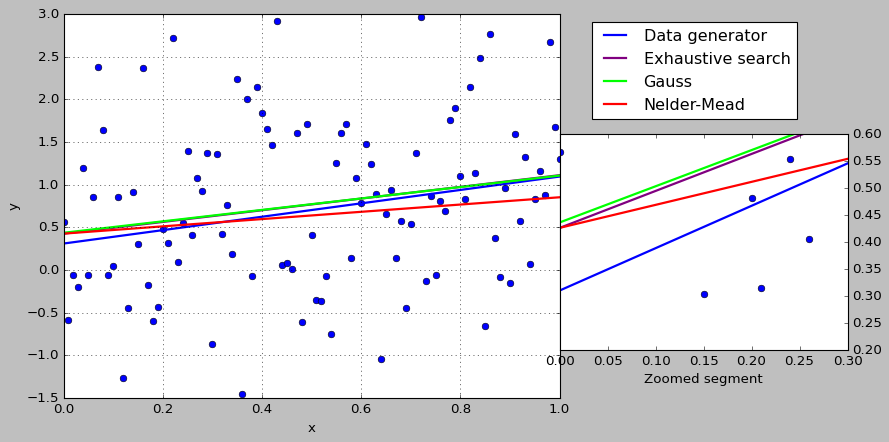

In [81]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x, y, "bo")
plt.axline((0, beta), slope = alpha, color = "blue", linewidth = 2, label= "Data generator")
plt.axline((0, esans[0][1]), slope = esans[0][0], color = "purple", linewidth = 2, label= "Exhaustive search")
plt.axline((0, cdans[0][1]), slope = cdans[0][0], color = "lime", linewidth = 2, label= "Gauss")
plt.axline((0, nmans.x[1]), slope = nmans.x[1], color = "red", linewidth = 2, label= "Nelder-Mead")
plt.xlabel("x")
plt.ylabel("y")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks(rotation = 45)
ax.grid(True)

axes = plt.axes([.90, .2, .45, .45])
axes.plot(x, y, "bo")
axes.set_xlim((0, 0.3))
axes.set_ylim((0.2, 0.6))
axes.yaxis.tick_right()
axes.axline((0, beta), slope = alpha, color = "blue", linewidth = 2, label= "Data generator")
axes.axline((0, esans[0][1]), slope = esans[0][0], color = "purple", linewidth = 2, label= "Exhaustive search")
axes.axline((0, cdans[0][1]), slope = cdans[0][0], color = "lime", linewidth = 2, label= "Gauss")
axes.axline((0, nmans.x[1]), slope = nmans.x[1], color = "red", linewidth = 2, label= "Nelder-Mead")
axes.set_xlabel("Zoomed segment")
#axes.plot(x_zoom, y_zoom, c='green', lw=1, label="Zoomed curve")


In [82]:
def cost_function_rational(a, b):
    y_pred = a/(1+b*x)
    return squares(y_pred, y)

In [91]:
esans = exhaustive_search2d(cost_function_rational, optpoint=(alpha, beta))
esans

((0.768, 0.0), 96.17175588831819, 1002001, 1002001, 0.3104657791126101)

In [85]:
cdans = coordinate_descent_method(cost_function_rational, optpoint=(alpha, beta))
cdans

((0.76877392578125, 0.0009877929687499998),
 96.18065680805157,
 77,
 147,
 0.3094379252432974)

In [87]:
nmans = so.minimize(fun = lambda x: cost_function_rational(*x), x0=np.zeros(2) , method = "Nelder-Mead", tol = 1e-3, bounds=((0,1), (0, 1)))



nmans, np.sqrt(np.sum(np.square(nmans.x - np.array([alpha, beta]))))

( final_simplex: (array([[ 0.50334018, -0.59615587],
        [ 0.50290798, -0.59549745],
        [ 0.50276997, -0.59586563]]), array([92.08496264, 92.08499487, 92.08510318]))
            fun: 92.0849626409907
        message: 'Optimization terminated successfully.'
           nfev: 59
            nit: 31
         status: 0
        success: True
              x: array([ 0.50334018, -0.59615587]),
 0.9489208170467113)

Text(0.5, 0, 'Zoomed sector')

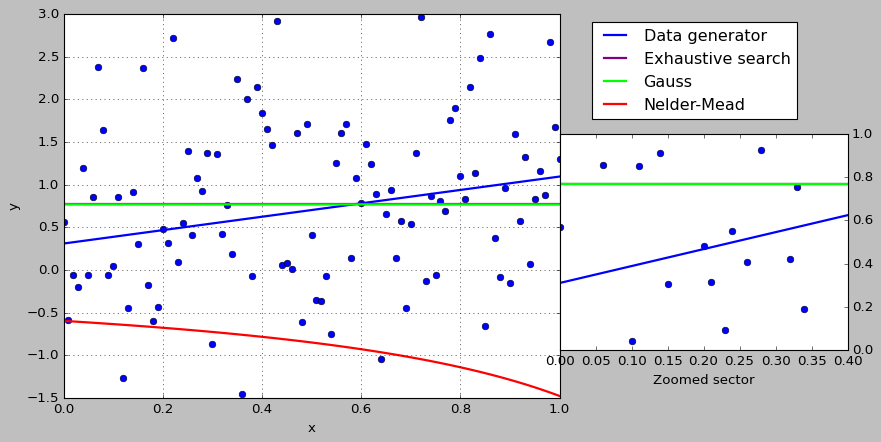

In [90]:
X = np.linspace(0, 1, 100)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x, y, "bo")
plt.axline((0, beta), slope = alpha, color = "blue", linewidth = 2, label= "Data generator")
plt.plot(X, esans[0][0]/(1+esans[0][1]*X), color = "purple", linewidth = 2, label= "Exhaustive search")
plt.plot(X, cdans[0][0]/(1+cdans[0][1]*X), color = "lime", linewidth = 2, label= "Gauss")
plt.plot(X, nmans.x[1]/(1+nmans.x[1]*X), color = "red", linewidth = 2, label= "Nelder-Mead")
plt.xlabel("x")
plt.ylabel("y")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks(rotation = 45)
ax.grid(True)

Xsub = np.linspace(0, 1, 100)
axes = plt.axes([.90, .2, .45, .45])
axes.plot(x, y, "bo")
axes.set_xlim((0, 0.4))
axes.set_ylim((0, 1))
axes.yaxis.tick_right()

axes.axline((0, beta), slope = alpha, color = "blue", linewidth = 2, label= "Data generator")
axes.plot(Xsub, esans[0][0]/(1+esans[0][1]*Xsub), color = "purple", linewidth = 2, label= "Exhaustive search")
axes.plot(Xsub, cdans[0][0]/(1+cdans[0][1]*Xsub), color = "lime", linewidth = 2, label= "Gauss")
axes.plot(Xsub, nmans.x[1]/(1+nmans.x[1]*Xsub), color = "red", linewidth = 2, label= "Nelder-Mead")
axes.set_xlabel("Zoomed sector")